In [1]:
#packages used in this homework
import math
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import cm
from cartopy import crs as ccrs, feature as cfeature
#import netCDF4 as nc
warnings.filterwarnings('ignore')

In [2]:
#changing working directory
os.chdir('/Users/carlos_lopez/MATH336/')

# 4.3

In [3]:
time = np.arange(0, 9)
distance_traveled = np.linspace(0, 440, 9)
print(time)
print(distance_traveled)
print(len(time)==len(distance_traveled))

[0 1 2 3 4 5 6 7 8]
[  0.  55. 110. 165. 220. 275. 330. 385. 440.]
True


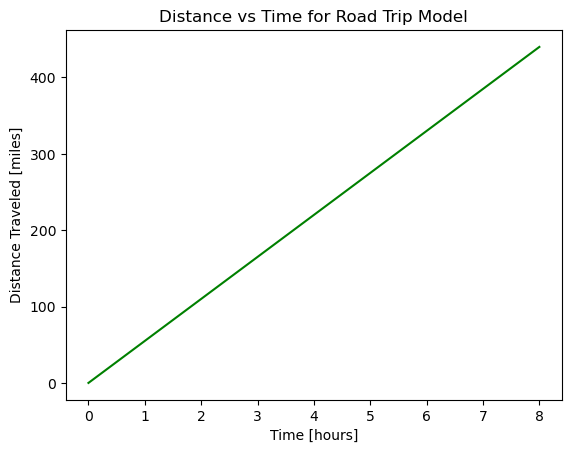

In [4]:
plt.plot(time, distance_traveled, color='green')
plt.xlabel("Time [hours]")
plt.ylabel("Distance Traveled [miles]")
plt.title("Distance vs Time for Road Trip Model")
plt.show()

# 5.1

In [5]:
def calculateHeight(velocity, gravitational_acceleration):
    return velocity**2/(2*gravitational_acceleration)

In [6]:
initial_velocity = 853 #m/s
acc_gravity = 9.8 #m/s^2
h = calculateHeight(initial_velocity, acc_gravity)
print(f"The calculated max height of the bullet is: {h} meters")

The calculated max height of the bullet is: 37122.9081632653 meters


In [7]:
time_to_fall = initial_velocity/acc_gravity
print(f"The time it took for the bullet to return to the ground is: {time_to_fall} seconds")

The time it took for the bullet to return to the ground is: 87.0408163265306 seconds


# 5.6

In [8]:
#want to draw 1000 a month for 118-69 years
#find how much to save from 30-68 with 5% interest/year
A = 1000*12*(118-69)
print(A) #total amount to have saved

588000


In [9]:
r = 0.05 #interest rate
n = 12 #number of months
t = (68-30) #time in years of savings

x = (A*(r/n)) / ((1+ r/n)**(n*t) - 1)
print("To be able to draw $1000 a month from ages 69 to 118,",end="")
print(f" you would have to save ${round(x, 2)} each month from ages 30 to 68.")

To be able to draw $1000 a month from ages 69 to 118, you would have to save $432.9 each month from ages 30 to 68.


# 5.7

In [10]:
from scipy import optimize as opt
#2:00 pm and 45N

def ebm_maker(a, s, l, betar, e, si, ka, t0, he):
    """
    This function accept a set of Energy Balance Model parameters
    and returns a lambda function with those parameters as a function
    of t.
    """
    return lambda t: (1-a)*s*np.cos(l)*np.cos(betar) - (e*si*(t**4) + ka*(t - t0)/he)

In [11]:
lat = 30*(np.pi/180) #latitude
beta = 45*(np.pi/180) #0 for noon , 15 for 1pm , 30 for 2pm , 45 for 3pm
# Conversion from degrees to radians.

sigma = 5.670367e-8 # Stefan-Boltzmann constant
alpha = 0.12 # Albedo of the lunar surface
S = 1368 # Solar constant for the Moon
ep = 0.98 # Emissivity of the lunar surface
k = 7.4e-4 #thermal conductivity of the moon’s surface regolith
h = 0.4 #lunar crust’s depth reachable by thermal conduction from surface
T0 = 260 #deep crust temperature
# These are the other parameters of the fEBM.

fEBM = ebm_maker(alpha, S, lat, beta, ep, sigma, k, T0, h)

res = opt.root(fEBM, x0=400)
x_root = res['x'][0]
print(f"Root of fEBM: x = {x_root} K")

Root of fEBM: x = 339.36352624300025 K


# 5.8

In [12]:
def ebm_maker2(a, s, lat, lon, betar, e, si, ka, t0, he):
    """
    This function accept a set of Energy Balance Model parameters
    and returns a lambda function with those parameters as a function
    of t.
    """
    return lambda t: (1-a)*s*np.cos(lat)*np.cos(lon)*np.cos(betar) - (e*si*(t**4) + ka*(t - t0)/he)

In [13]:
beta1 = 0*(np.pi/180) #0 for noon
lat1 = 0*(np.pi/180) #0 for equator of moon
lon1 = np.linspace(-40, 40,24)*(np.pi/180) #24 evenly spaced longitude points

EBMTable = np.zeros((24, 3))

for i in range(24):
    EBMTable[i][0] = lon1[i]
    fEBM = ebm_maker2(alpha, S, lat1, lon1[i], beta1, ep, sigma, k, T0, h)
    res = opt.root(fEBM, x0=400)
    x_root = res['x'][0]
    EBMTable[i][1] = x_root
    EBMTable[i][2] = x_root - 273.15 #convert kelvin to celcius

In [14]:
EBMs = pd.DataFrame(EBMTable, columns=['Longitude [radians]', 'Temp [K]', 'Temp [C]'])

print(EBMs)

    Longitude [radians]    Temp [K]    Temp [C]
0             -0.698132  358.901133   85.751133
1             -0.637425  363.224917   90.074917
2             -0.576717  367.075896   93.925896
3             -0.516010  370.480937   97.330937
4             -0.455303  373.461919  100.311919
5             -0.394596  376.036669  102.886669
6             -0.333889  378.219656  105.069656
7             -0.273182  380.022515  106.872515
8             -0.212475  381.454440  108.304440
9             -0.151768  382.522474  109.372474
10            -0.091061  383.231731  110.081731
11            -0.030354  383.585538  110.435538
12             0.030354  383.585538  110.435538
13             0.091061  383.231731  110.081731
14             0.151768  382.522474  109.372474
15             0.212475  381.454440  108.304440
16             0.273182  380.022515  106.872515
17             0.333889  378.219656  105.069656
18             0.394596  376.036669  102.886669
19             0.455303  373.461919  100

# 6.1

## (a)

In [15]:
#Solving for each I 1-5
A = np.array([9000,6000,0,0,0, 9000,0,3000,4000,0, 9000,0,3000,0,12000, 1,-1,-1,0,0, 0,0,1,-1,-1]).reshape(5,5, order='F')
b = np.array([12, 12, 12, 0, 0])
#use numpy to solve the system of linear equations and print output
x = np.linalg.solve(A,b)
print(f"Solution to Ax = b: x = {x}")

Solution to Ax = b: x = [ 1.0e-03  7.5e-04  2.5e-04 -6.0e+00  3.0e+00]


# 6.4

## (a)

In [16]:
#Leontif production model: a balance of the output and input
#(I - A)x = D
#A is the i/o matrix of the 1947 US economy with P production and C consumption
#D is the bill of demands in billions

I = np.identity(3) #3-dim identity matrix
A = np.array([[0.245, 0.102, 0.051],
              [0.099, 0.291, 0.279],
              [0.433, 0.372, 0.011]])
D = np.array([2.88, 31.45, 30.91])
#use numpy to solve the system of linear equations and print output
x1 = np.linalg.solve(I-A, D)
print(f"Solution to (I-A)x1 = D: x1 = {x1}")

Solution to (I-A)x1 = D: x1 = [18.20792271 73.16603495 66.74600155]


# 6.8

In [17]:
# Read CSV file from data folder in working directory
path = 'data/NOAAGlobalT.csv'
NOAAGlobalT = pd.read_csv(path)
#print first 5 rows
print(NOAAGlobalT.head(5))

   Unnamed: 0   LAT   LON  1880-1  1880-2  1880-3  1880-4  1880-5  1880-6  \
0           1 -87.5   2.5  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   
1           2 -87.5   7.5  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   
2           3 -87.5  12.5  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   
3           4 -87.5  17.5  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   
4           5 -87.5  22.5  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   

   1880-7  ...  2016-4  2016-5  2016-6  2016-7  2016-8  2016-9  2016-10  \
0  -999.9  ...  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   -999.9   
1  -999.9  ...  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   -999.9   
2  -999.9  ...  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   -999.9   
3  -999.9  ...  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   -999.9   
4  -999.9  ...  -999.9  -999.9  -999.9  -999.9  -999.9  -999.9   -999.9   

   2016-11  2016-12  2017-1  
0   -999.9   -999.9  -999.9  
1   -999.9   -999.9  -999.

In [18]:
#print data shape
print(NOAAGlobalT.shape)
#print column names
print(NOAAGlobalT.columns)

(2592, 1648)
Index(['Unnamed: 0', 'LAT', 'LON', '1880-1', '1880-2', '1880-3', '1880-4',
       '1880-5', '1880-6', '1880-7',
       ...
       '2016-4', '2016-5', '2016-6', '2016-7', '2016-8', '2016-9', '2016-10',
       '2016-11', '2016-12', '2017-1'],
      dtype='object', length=1648)


In [26]:
#find tropical Pacific: (20◦S − 20◦N, 160◦E − 100◦W)
#data covers: (87.5◦S - 87.5◦N, 2.5◦E-357.5◦E)
#so Pacific will be: (20◦S − 20◦N, 160◦E − 260◦E)
data = NOAAGlobalT[(NOAAGlobalT['LAT'] >= -20.0) & (NOAAGlobalT['LAT'] <= 20.0) &
                       (NOAAGlobalT['LON'] >= 160.0) & (NOAAGlobalT['LON'] <= 260.0)]
data = data.set_index(['LAT', 'LON'])

years_1951_2000 = range(1951, 2001)
yearly_averages = {}

for year in years_1951_2000:
    # Select months from July of the current year to June of the following year
    months_july_to_june = [f"{year}-{m}" for m in range(7, 13)] + [f"{year + 1}-{m}" for m in range(1, 7)]
    months_july_to_june = [col for col in months_july_to_june if col in data.columns]
    # Calculate the mean for each grid point across these 12 months
    yearly_averages[year] = data[months_july_to_june].replace(-999.9, np.nan).mean(axis=1)

# Combine results into a DataFrame for easier access
PacificMeans = pd.DataFrame(yearly_averages)
PacificMeans

1951      1952      1953      1954      1955      1956  \
LAT   LON                                                                 
-17.5 162.5 -0.493783 -0.309958 -0.230967 -0.511483 -0.008425 -0.072525   
      167.5 -0.339567 -0.191250 -0.196342 -0.398475  0.104742 -0.008958   
      172.5 -0.190375  0.017858 -0.107317 -0.272692  0.229858  0.108667   
      177.5 -0.132200  0.132467 -0.117283 -0.217000  0.117400  0.112142   
      182.5  0.024742  0.401783 -0.011967 -0.073200  0.120900  0.223592   
...               ...       ...       ...       ...       ...       ...   
 17.5 237.5 -0.206175 -0.313300 -0.322058 -0.243192 -0.927158 -0.254967   
      242.5  0.033908 -0.059492 -0.062408 -0.219683 -0.929675 -0.044950   
      247.5  0.177925  0.105667  0.146867 -0.263425 -0.746642  0.163892   
      252.5  0.216058  0.134267  0.240925 -0.271833 -0.532175  0.223275   
      257.5  0.139533 -0.027250  0.096333 -0.235275 -0.414650  0.009642   

                 1957      1958      1959      1960  ...      1991      1992  \
LAT   LON                                            ...                       
-17.5 162.5 -0.289600 -0.373600 -0.231967 -0.423608  ... -0.195558 -0.477933   
      167.5 -0.281642 -0.382525 -0.195667 -0.242392  ... -0.213458 -0.381675   
      172.5 -0.251567 -0.344175 -0.115708 -0.014475  ... -0.194917 -0.257542   
      177.5 -0.246158 -0.317633 -0.103250  0.122408  ... -0.091242 -0.056408   
      182.5 -0.160633 -0.196775  0.002133  0.324050  ...  0.024100  0.148325   
...               ...       ...       ...       ...  ...       ...       ...   
 17.5 237.5  0.255883  0.576775  0.352017 -0.304150  ...  0.086317  0.941950   
      242.5  0.520267  0.770625  0.349092 -0.177217  ...  0.157675  0.934683   
      247.5  0.776908  0.898500  0.186717 -0.043650  ...  0.222708  0.743142   
      252.5  0.812317  0.840083  0.031192  0.033125  ...  0.230400  0.504067   
      257.5  0.312292  0.336508 -0.136533 -0.052467  ...  0.148200  0.324000   

                 1993      1994      1995      1996      1997      1998  \
LAT   LON                                                                 
-17.5 162.5 -0.357850 -0.129875  0.394658  0.064767  0.251700  0.664483   
      167.5 -0.328192 -0.163250  0.362625  0.069708  0.087558  0.632633   
      172.5 -0.302008 -0.209750  0.358950  0.084008 -0.144283  0.611833   
      177.5 -0.185575 -0.166117  0.378333  0.158425 -0.283933  0.493800   
      182.5 -0.081442 -0.167742  0.416967  0.245092 -0.466083  0.399433   
...               ...       ...       ...       ...       ...       ...   
 17.5 237.5  0.790617  0.568250  0.200067  0.233017  0.146100 -0.394433   
      242.5  0.648892  0.566125  0.272692  0.309233  0.331800 -0.252975   
      247.5  0.387933  0.429633  0.305842  0.254692  0.487400 -0.088217   
      252.5  0.185208  0.315517  0.293983  0.129100  0.465883  0.018050   
      257.5  0.185967  0.334950  0.249467  0.140800  0.377867  0.278142   

                 1999      2000  
LAT   LON                        
-17.5 162.5  0.183492  0.412267  
      167.5  0.291800  0.438625  
      172.5  0.382508  0.460842  
      177.5  0.435550  0.415417  
      182.5  0.471592  0.411525  
...               ...       ...  
 17.5 237.5 -0.427917 -0.162525  
      242.5 -0.475742 -0.126650  
      247.5 -0.486575 -0.116950  
      252.5 -0.452133 -0.087317  
      257.5 -0.126842  0.138925  

[160 rows x 50 columns]

## (a)

In [20]:
#perform SVD by converting df to a numpy array and using np.linalg.svd
data_matrix = PacificMeans.to_numpy()
U, D, Vt = np.linalg.svd(data_matrix, full_matrices=False)

#visualize shape/length of input to output vectors
print(np.shape(data_matrix))
print(np.shape(U))
print(np.shape(D))
print(np.shape(Vt))

(160, 50)
(160, 50)
(50,)
(50, 50)


In [21]:
#print out first 10 eigenvalues
print("First 10 eigenvalues:", end="")
print(D[:10])

First 10 eigenvalues:[36.94637137 14.65393118 11.39871969  6.83325559  5.89299892  4.79493824
  4.01921683  3.5100375   2.89028667  2.67250365]


## (b)

In [22]:
U

array([[-0.01495359, -0.06206842, -0.08904918, ..., -0.00150619,
         0.02989472, -0.05359553],
       [-0.01891625, -0.05930192, -0.08839613, ...,  0.06552718,
         0.02566563,  0.03395372],
       [-0.02575189, -0.04951989, -0.07216166, ...,  0.08774522,
         0.05584561,  0.02805319],
       ...,
       [ 0.04922648,  0.05930538, -0.03025411, ...,  0.00221668,
         0.0496678 ,  0.01687778],
       [ 0.04361979,  0.03396588, -0.00476999, ...,  0.02563396,
         0.07798121, -0.01287007],
       [ 0.03243974,  0.00982198, -0.04983166, ...,  0.14070509,
        -0.02927537,  0.01015069]])

In [23]:
# Extract the first three spatial patterns (EOFs)
EOFs = U[:, :3]
#print(EOFs[:,0])
print(EOFs.shape)

(160, 3)


In [27]:
#find the unique latitude and longitude coordinates for each 5x5 grid in the pacific
unique_lats = sorted(PacificMeans.index.get_level_values('LAT').unique())
unique_lons = sorted(PacificMeans.index.get_level_values('LON').unique())
#get the count of each: their product should be 160 for the 160 rows of the DataFrame
lat_count = len(unique_lats)
lon_count = len(unique_lons)
#visualize count of each
print(lat_count)
print(lon_count)

8
20


In [28]:
# Reshape EOFs to (lat_count, lon_count) for plotting
EOF1 = EOFs[:, 0].reshape((lat_count, lon_count))
EOF2 = EOFs[:, 1].reshape((lat_count, lon_count))
EOF3 = EOFs[:, 2].reshape((lat_count, lon_count))

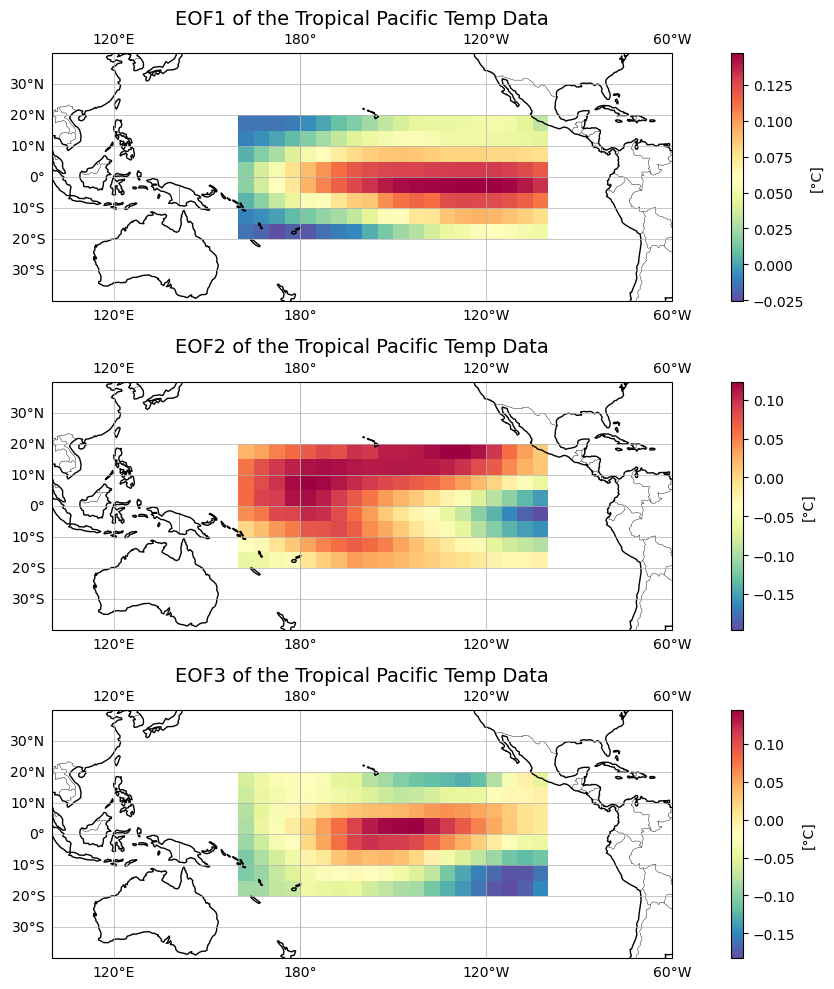

In [29]:
# Create Pacific-centered map projection
fig, axes = plt.subplots(3, 1, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# Define a colormap
cmap = sns.color_palette("Spectral_r", n_colors=200, as_cmap=True)

# Plot each EOF on a Pacific-centered map
for i, (EOF, ax) in enumerate(zip([EOF1, EOF2, EOF3], axes)):
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.set_extent([100, 300, -40, 40], crs=ccrs.PlateCarree())  # Limits to tropical Pacific region
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5)
    c = ax.pcolormesh(unique_lons, unique_lats, EOF, cmap=cmap, shading='auto', transform=ccrs.PlateCarree())
    fig.colorbar(c, ax=ax, orientation="vertical", pad=0.05, label="[°C]")
    ax.set_title(f"EOF{i+1} of the Tropical Pacific Temp Data", fontsize=14)

plt.tight_layout()
plt.show()

## (c)

In [30]:
#plot the first three PC's
PCs = Vt[:, :3]

print(PCs.shape)

(50, 3)


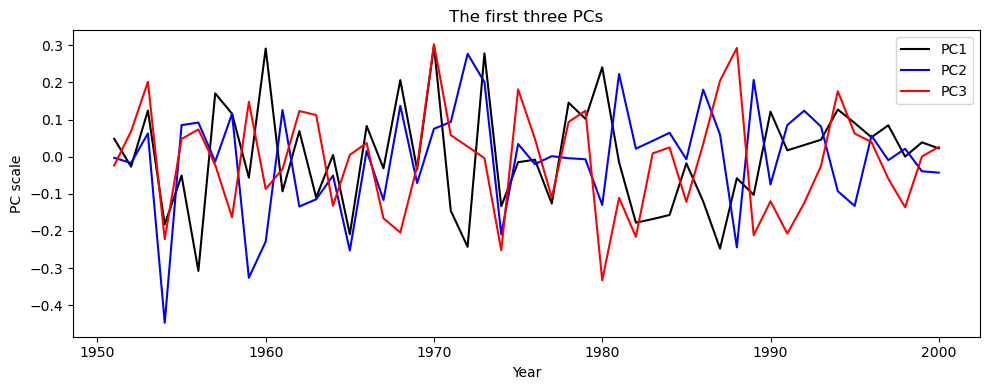

In [31]:
timepoints = np.arange(1951, 2001)  # Time points for x-axis
plt.figure(figsize=(10,4))

plt.plot(timepoints, PCs[:, 0], color='black', label='PC1')
plt.plot(timepoints, PCs[:, 1], color='blue', label='PC2')
plt.plot(timepoints, PCs[:, 2], color='red', label='PC3')
plt.title("The first three PCs")
plt.xlabel("Year")
plt.ylabel("PC scale")
plt.legend()
plt.tight_layout()
plt.show()